In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.io
import torch
import math

# Constants

In [2]:
current_dir = os.getcwd()
data_folder = os.path.join("raw_data", "CWRU_raw")
N_POINTS = 120000 # ~12k sampling rate and 10 seconds of data

In [3]:
#* Metadata of the raw files
dfMetadata = pd.read_csv(os.path.join(current_dir, data_folder, "CWRU_metadata.csv"), skip_blank_lines=True)
pd.set_option('display.max_rows', None)
dfMetadata.dropna(axis=0, inplace=True)
dfMetadata

,File,Defect,Sampling_rate,Fault_diameter,Motor_load,Motor_speed,Inner_race,Ball,Outer_race_centered,Outer_race_orthogonal,Outer_race_opposite,Fault_type
0,97.mat,normal,12k,0.000,0,1797,0,0,0,0,0,normal
1,98.mat,normal,12k,0.000,1,1772,0,0,0,0,0,normal
2,99.mat,normal,12k,0.000,2,1750,0,0,0,0,0,normal
3,100.mat,normal,12k,0.000,3,1730,0,0,0,0,0,normal
4,105.mat,drive-end,12k,0.007,0,1797,1,0,0,0,0,inner
5,106.mat,drive-end,12k,0.007,1,1772,1,0,0,0,0,inner
6,107.mat,drive-end,12k,0.007,2,1750,1,0,0,0,0,inner
7,108.mat,drive-end,12k,0.007,3,1730,1,0,0,0,0,inner
8,118.mat,drive-end,12k,0.007,0,1797,0,1,0,0,0,ball
9,119.mat,drive-end,12k,0.007,1,1772,0,1,0,0,0,ball


# Loading dataset function

In [4]:
#* Define function to load the appropriate matlab file
def loadTimeseriesSensorData(defect,sampling_rate,fault_diameter,motor_load,fault_type):
    # fault_type must be ether 'inner', 'ball', 'outer-cen', outer-ort',
    # or outer-opp; end is either DE (for data generated at drive-end) or 
    # FE (for data generated at fan-end)
    file_name = dfMetadata[(dfMetadata.Defect==defect) &\
        (dfMetadata.Sampling_rate==sampling_rate) &\
        (dfMetadata.Fault_diameter.round(decimals=3)==fault_diameter) &\
        (dfMetadata.Motor_load==motor_load) &\
        (dfMetadata.Fault_type==fault_type)].iloc[0].File
    bearing_dic = scipy.io.loadmat(os.path.join(current_dir, data_folder, file_name))
    if len(file_name) == 6:
        file_name = "0" + file_name
        
    return bearing_dic[f"X{file_name.strip('.mat')}_DE_time"], bearing_dic[f"X{file_name.strip('.mat')}_FE_time"]

# Data visualisation

In [5]:
# Load a specific timeseries CWRU bearing data
defect = 'normal'
sampling_rate = '12k'
fault_diameter = 0 
motor_load = 0
fault_type = 'normal'
timeseries, _ = loadTimeseriesSensorData(defect,sampling_rate,fault_diameter,motor_load,fault_type)

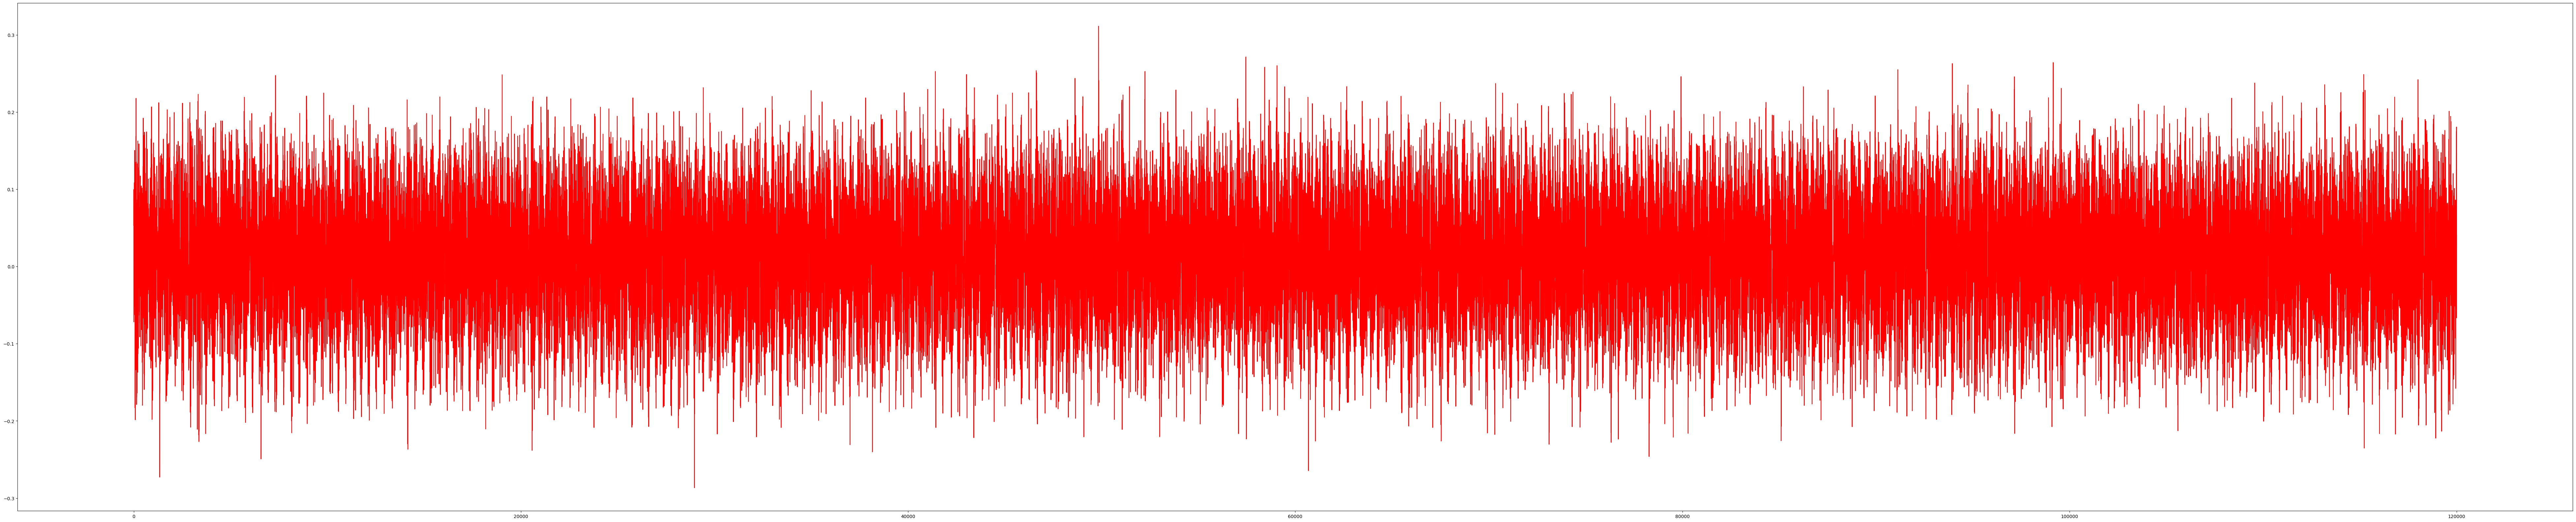

In [6]:
# Visualise the vibration data of a raw sample
plt.figure(0,figsize=(100,20))        
plt.plot (timeseries[0:N_POINTS],'red')
plt.show()

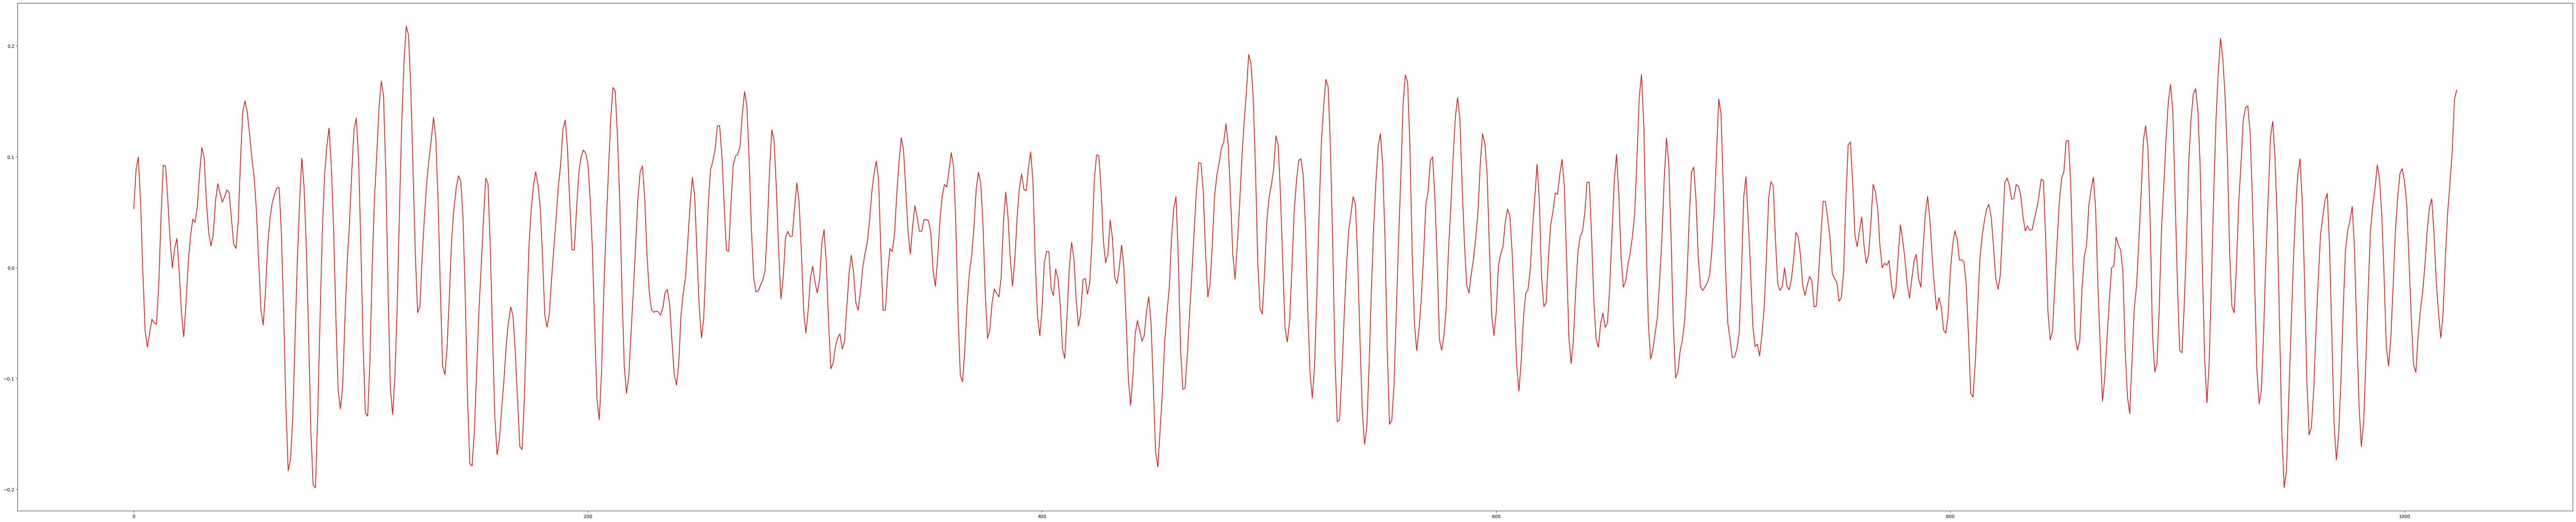

In [7]:
# Visualise the vibration data for a sliced sample
plt.figure(0,figsize=(100,20))        
plt.plot (timeseries[0:1024],'red')
plt.show()

# Data loading

In [8]:

# normal

DE_normal_0, FE_normal_0 = loadTimeseriesSensorData('normal','12k',0,0,'normal')
DE_normal_1, FE_normal_1 = loadTimeseriesSensorData('normal','12k',0,1,'normal')
DE_normal_2, FE_normal_2 = loadTimeseriesSensorData('normal','12k',0,2,'normal')
DE_normal_3, FE_normal_3 = loadTimeseriesSensorData('normal','12k',0,3,'normal')

##### DE FAULT #####
# inner fault

DE_ir007_0, _ = loadTimeseriesSensorData('drive-end','12k',0.007,0,'inner')
DE_ir007_1, _ = loadTimeseriesSensorData('drive-end','12k',0.007,1,'inner')
DE_ir007_2, _ = loadTimeseriesSensorData('drive-end','12k',0.007,2,'inner')
DE_ir007_3, _ = loadTimeseriesSensorData('drive-end','12k',0.007,3,'inner')

DE_ir014_0, _ = loadTimeseriesSensorData('drive-end','12k',0.014,0,'inner')
DE_ir014_1, _ = loadTimeseriesSensorData('drive-end','12k',0.014,1,'inner')
DE_ir014_2, _ = loadTimeseriesSensorData('drive-end','12k',0.014,2,'inner')
DE_ir014_3, _ = loadTimeseriesSensorData('drive-end','12k',0.014,3,'inner')

DE_ir021_0, _ = loadTimeseriesSensorData('drive-end','12k',0.021,0,'inner')
DE_ir021_1, _ = loadTimeseriesSensorData('drive-end','12k',0.021,1,'inner')
DE_ir021_2, _ = loadTimeseriesSensorData('drive-end','12k',0.021,2,'inner')
DE_ir021_3, _ = loadTimeseriesSensorData('drive-end','12k',0.021,3,'inner')

# ball fault

DE_b007_0, _ = loadTimeseriesSensorData('drive-end','12k',0.007,0,'ball')
DE_b007_1, _ = loadTimeseriesSensorData('drive-end','12k',0.007,1,'ball')
DE_b007_2, _ = loadTimeseriesSensorData('drive-end','12k',0.007,2,'ball')
DE_b007_3, _ = loadTimeseriesSensorData('drive-end','12k',0.007,3,'ball')

DE_b014_0, _ = loadTimeseriesSensorData('drive-end','12k',0.014,0,'ball')
DE_b014_1, _ = loadTimeseriesSensorData('drive-end','12k',0.014,1,'ball')
DE_b014_2, _ = loadTimeseriesSensorData('drive-end','12k',0.014,2,'ball')
DE_b014_3, _ = loadTimeseriesSensorData('drive-end','12k',0.014,3,'ball')

DE_b021_0, _ = loadTimeseriesSensorData('drive-end','12k',0.021,0,'ball')
DE_b021_1, _ = loadTimeseriesSensorData('drive-end','12k',0.021,1,'ball')
DE_b021_2, _ = loadTimeseriesSensorData('drive-end','12k',0.021,2,'ball')
DE_b021_3, _ = loadTimeseriesSensorData('drive-end','12k',0.021,3,'ball')

# outer fault

DE_or007at6_0, _ = loadTimeseriesSensorData('drive-end','12k',0.007,0,'outer')
DE_or007at6_1, _ = loadTimeseriesSensorData('drive-end','12k',0.007,1,'outer')
DE_or007at6_2, _ = loadTimeseriesSensorData('drive-end','12k',0.007,2,'outer')
DE_or007at6_3, _ = loadTimeseriesSensorData('drive-end','12k',0.007,3,'outer')

DE_or014at6_0, _ = loadTimeseriesSensorData('drive-end','12k',0.014,0,'outer')
DE_or014at6_1, _ = loadTimeseriesSensorData('drive-end','12k',0.014,1,'outer')
DE_or014at6_2, _ = loadTimeseriesSensorData('drive-end','12k',0.014,2,'outer')
DE_or014at6_3, _ = loadTimeseriesSensorData('drive-end','12k',0.014,3,'outer')

DE_or021at6_0, _ = loadTimeseriesSensorData('drive-end','12k',0.021,0,'outer')
DE_or021at6_1, _ = loadTimeseriesSensorData('drive-end','12k',0.021,1,'outer')
DE_or021at6_2, _ = loadTimeseriesSensorData('drive-end','12k',0.021,2,'outer')
DE_or021at6_3, _ = loadTimeseriesSensorData('drive-end','12k',0.021,3,'outer')

##### FE FAULT #####
# inner fault

FE_ir007_0, _ = loadTimeseriesSensorData('fan-end','12k',0.007,0,'inner')
FE_ir007_1, _ = loadTimeseriesSensorData('fan-end','12k',0.007,1,'inner')
FE_ir007_2, _ = loadTimeseriesSensorData('fan-end','12k',0.007,2,'inner')
FE_ir007_3, _ = loadTimeseriesSensorData('fan-end','12k',0.007,3,'inner')

FE_ir014_0, _ = loadTimeseriesSensorData('fan-end','12k',0.014,0,'inner')
FE_ir014_1, _ = loadTimeseriesSensorData('fan-end','12k',0.014,1,'inner')
FE_ir014_2, _ = loadTimeseriesSensorData('fan-end','12k',0.014,2,'inner')
FE_ir014_3, _ = loadTimeseriesSensorData('fan-end','12k',0.014,3,'inner')

FE_ir021_0, _ = loadTimeseriesSensorData('fan-end','12k',0.021,0,'inner')
FE_ir021_1, _ = loadTimeseriesSensorData('fan-end','12k',0.021,1,'inner')
FE_ir021_2, _ = loadTimeseriesSensorData('fan-end','12k',0.021,2,'inner')
FE_ir021_3, _ = loadTimeseriesSensorData('fan-end','12k',0.021,3,'inner')

# ball fault

FE_b007_0, _ = loadTimeseriesSensorData('fan-end','12k',0.007,0,'ball')
FE_b007_1, _ = loadTimeseriesSensorData('fan-end','12k',0.007,1,'ball')
FE_b007_2, _ = loadTimeseriesSensorData('fan-end','12k',0.007,2,'ball')
FE_b007_3, _ = loadTimeseriesSensorData('fan-end','12k',0.007,3,'ball')

FE_b014_0, _ = loadTimeseriesSensorData('fan-end','12k',0.014,0,'ball')
FE_b014_1, _ = loadTimeseriesSensorData('fan-end','12k',0.014,1,'ball')
FE_b014_2, _ = loadTimeseriesSensorData('fan-end','12k',0.014,2,'ball')
FE_b014_3, _ = loadTimeseriesSensorData('fan-end','12k',0.014,3,'ball')

FE_b021_0, _ = loadTimeseriesSensorData('fan-end','12k',0.021,0,'ball')
FE_b021_1, _ = loadTimeseriesSensorData('fan-end','12k',0.021,1,'ball')
FE_b021_2, _ = loadTimeseriesSensorData('fan-end','12k',0.021,2,'ball')
FE_b021_3, _ = loadTimeseriesSensorData('fan-end','12k',0.021,3,'ball')

# outer fault

FE_or007at6_0, _ = loadTimeseriesSensorData('fan-end','12k',0.007,0,'outer')
FE_or007at6_1, _ = loadTimeseriesSensorData('fan-end','12k',0.007,1,'outer')
FE_or007at6_2, _ = loadTimeseriesSensorData('fan-end','12k',0.007,2,'outer')
FE_or007at6_3, _ = loadTimeseriesSensorData('fan-end','12k',0.007,3,'outer')

FE_or014at6_0, _ = loadTimeseriesSensorData('fan-end','12k',0.014,0,'outer')
FE_or014at6_1, _ = loadTimeseriesSensorData('fan-end','12k',0.014,1,'outer')
FE_or014at6_2, _ = loadTimeseriesSensorData('fan-end','12k',0.014,2,'outer')
FE_or014at6_3, _ = loadTimeseriesSensorData('fan-end','12k',0.014,3,'outer')

FE_or021at6_0, _ = loadTimeseriesSensorData('fan-end','12k',0.021,0,'outer')
FE_or021at6_1, _ = loadTimeseriesSensorData('fan-end','12k',0.021,1,'outer')
FE_or021at6_2, _ = loadTimeseriesSensorData('fan-end','12k',0.021,2,'outer')
FE_or021at6_3, _ = loadTimeseriesSensorData('fan-end','12k',0.021,3,'outer')


# Dividing files into domains

In [9]:
domain_7 = np.concatenate((
    DE_normal_0[0:N_POINTS], DE_normal_1[0:N_POINTS], DE_normal_2[0:N_POINTS], DE_normal_3[0:N_POINTS],
    DE_ir007_0[0:N_POINTS], DE_ir007_1[0:N_POINTS], DE_ir007_2[0:N_POINTS], DE_ir007_3[0:N_POINTS],
    DE_b007_0[0:N_POINTS], DE_b007_1[0:N_POINTS], DE_b007_2[0:N_POINTS], DE_b007_3[0:N_POINTS], 
    DE_or007at6_0[0:N_POINTS], DE_or007at6_1[0:N_POINTS], DE_or007at6_2[0:N_POINTS], DE_or007at6_3[0:N_POINTS],
    FE_ir007_0[0:N_POINTS], FE_ir007_1[0:N_POINTS], FE_ir007_2[0:N_POINTS], FE_ir007_3[0:N_POINTS],
    FE_b007_0[0:N_POINTS], FE_b007_1[0:N_POINTS], FE_b007_2[0:N_POINTS], FE_b007_3[0:N_POINTS], 
    FE_or007at6_0[0:N_POINTS], FE_or007at6_1[0:N_POINTS], FE_or007at6_2[0:N_POINTS], FE_or007at6_3[0:N_POINTS]), 
    axis=1)

domain_14 = np.concatenate((
    DE_normal_0[0:N_POINTS], DE_normal_1[0:N_POINTS], DE_normal_2[0:N_POINTS], DE_normal_3[0:N_POINTS],
    DE_ir014_0[0:N_POINTS], DE_ir014_1[0:N_POINTS], DE_ir014_2[0:N_POINTS], DE_ir014_3[0:N_POINTS],
    DE_b014_0[0:N_POINTS], DE_b014_1[0:N_POINTS], DE_b014_2[0:N_POINTS], DE_b014_3[0:N_POINTS], 
    DE_or014at6_0[0:N_POINTS], DE_or014at6_1[0:N_POINTS], DE_or014at6_2[0:N_POINTS], DE_or014at6_3[0:N_POINTS],
    FE_ir014_0[0:N_POINTS], FE_ir014_1[0:N_POINTS], FE_ir014_2[0:N_POINTS], FE_ir014_3[0:N_POINTS],
    FE_b014_0[0:N_POINTS], FE_b014_1[0:N_POINTS], FE_b014_2[0:N_POINTS], FE_b014_3[0:N_POINTS], 
    FE_or014at6_0[0:N_POINTS], FE_or014at6_1[0:N_POINTS], FE_or014at6_2[0:N_POINTS], FE_or014at6_3[0:N_POINTS]), 
    axis=1)

domain_21 = np.concatenate((
    DE_normal_0[0:N_POINTS], DE_normal_1[0:N_POINTS], DE_normal_2[0:N_POINTS], DE_normal_3[0:N_POINTS],
    DE_ir021_0[0:N_POINTS], DE_ir021_1[0:N_POINTS], DE_ir021_2[0:N_POINTS], DE_ir021_3[0:N_POINTS],
    DE_b021_0[0:N_POINTS], DE_b021_1[0:N_POINTS], DE_b021_2[0:N_POINTS], DE_b021_3[0:N_POINTS], 
    DE_or021at6_0[0:N_POINTS], DE_or021at6_1[0:N_POINTS], DE_or021at6_2[0:N_POINTS], DE_or021at6_3[0:N_POINTS],
    FE_ir021_0[0:N_POINTS], FE_ir021_1[0:N_POINTS], FE_ir021_2[0:N_POINTS], FE_ir021_3[0:N_POINTS],
    FE_b021_0[0:N_POINTS], FE_b021_1[0:N_POINTS], FE_b021_2[0:N_POINTS], FE_b021_3[0:N_POINTS], 
    FE_or021at6_0[0:N_POINTS], FE_or021at6_1[0:N_POINTS], FE_or021at6_2[0:N_POINTS], FE_or021at6_3[0:N_POINTS]), 
    axis=1)

domain_7 = torch.from_numpy(domain_7)
domain_14 = torch.from_numpy(domain_14)
domain_21 = torch.from_numpy(domain_21)

print(f"domain 7: {domain_7.shape}")
print(f"domain 14: {domain_14.shape}")
print(f"domain 21: {domain_21.shape}")

domain 7: torch.Size([120000, 28])
domain 14: torch.Size([120000, 28])
domain 21: torch.Size([120000, 28])


# Labels for domains

In [10]:
domain_labels = torch.tensor([0, 0, 0, 0,
                              1, 1, 1, 1,
                              2, 2, 2, 2,
                              3, 3, 3, 3,
                              4, 4, 4, 4,
                              5, 5, 5, 5,
                              6, 6, 6, 6])
domain_labels.shape

torch.Size([28])

# Split to train, validate, test sets

In [11]:
TEST_SIZE = 0.2
N_FOLDS = 5

def split(data):
    DATA_LEN = data.shape[0]
    TEST_LEN = int(TEST_SIZE * DATA_LEN)
    TRAIN_VAL_LEN = DATA_LEN - TEST_LEN
    VAL_LEN = TRAIN_VAL_LEN // N_FOLDS
    TRAIN_LEN = TRAIN_VAL_LEN - VAL_LEN

    train_data, val_data, test_data = torch.split(data, [TRAIN_LEN, VAL_LEN, TEST_LEN], dim=0)

    return train_data, val_data, test_data

In [12]:
train_7, val_7, test_7 = split(domain_7)
train_14, val_14, test_14 = split(domain_14)
train_21, val_21, test_21 = split(domain_21)


print(f"domain 7: {train_7.shape}, {val_7.shape}, {test_7.shape}")
print(f"domain 14: {train_14.shape}, {val_14.shape}, {test_14.shape}")
print(f"domain 21: {train_21.shape}, {val_21.shape}, {test_21.shape}")

domain 7: torch.Size([76800, 28]), torch.Size([19200, 28]), torch.Size([24000, 28])
domain 14: torch.Size([76800, 28]), torch.Size([19200, 28]), torch.Size([24000, 28])
domain 21: torch.Size([76800, 28]), torch.Size([19200, 28]), torch.Size([24000, 28])


# Sampling

In [13]:
WINDOW_SIZE = 1024
STRIDE = 1024

def create_subsamples(x, y):
    # Get the shape of the tensor
    L, N = x.shape # L: length, N: Number of samples

    # Compute the number of subsamples that will be created for each sample
    num_subsamples = (L - WINDOW_SIZE) // STRIDE + 1

    # Initialize an empty tensor to hold the subsamples
    subsamples = torch.empty((num_subsamples * N, WINDOW_SIZE), dtype=x.dtype)
    
    # Initialize an empty tensor to hold the class labels of the subsamples
    subsample_classes = torch.empty((num_subsamples * N,), dtype=y.dtype)

    # Iterate over each sample in the input tensor
    for i in range(N):
        # For each sample, iterate over each window position and extract the subsample
        for j in range(num_subsamples):
            start = j * STRIDE
            end = start + WINDOW_SIZE
            subsamples[i*num_subsamples + j] = x[start:end, i]
            # Assign the class of the original sample to the subsample
            subsample_classes[i*num_subsamples + j] = y[i]

    return {"samples": subsamples, "labels": subsample_classes}

In [14]:
train_samples_7 = create_subsamples(train_7, domain_labels)
val_samples_7 = create_subsamples(val_7, domain_labels)
test_samples_7 = create_subsamples(test_7, domain_labels)

train_samples_14 = create_subsamples(train_14, domain_labels)
val_samples_14 = create_subsamples(val_14, domain_labels)
test_samples_14 = create_subsamples(test_14, domain_labels)

train_samples_21 = create_subsamples(train_21, domain_labels)
val_samples_21 = create_subsamples(val_21, domain_labels)
test_samples_21 = create_subsamples(test_21, domain_labels)

print(train_samples_7)
print(train_samples_7['samples'].shape)
print(train_samples_7['labels'].shape)

{'samples': tensor([[ 5.3197e-02,  8.8662e-02,  9.9718e-02,  ...,  1.0452e-01,
          1.5187e-01,  1.6022e-01],
        [ 1.3477e-01,  8.5115e-02,  1.5020e-02,  ...,  2.0862e-04,
         -2.1905e-02, -7.1138e-02],
        [-9.5546e-02, -9.1374e-02, -5.6535e-02,  ...,  2.7746e-02,
          2.0236e-02,  4.2349e-02],
        ...,
        [-4.1533e-02, -5.8016e-02, -8.2659e-02,  ..., -7.0683e-02,
          5.2778e-04,  1.7397e-01],
        [ 9.1388e-02, -1.3877e-01, -9.0698e-02,  ..., -3.1261e-02,
         -1.8310e-02, -1.1165e-01],
        [-9.5773e-02,  1.8135e-01,  2.5577e-01,  ..., -6.4593e-02,
         -3.1342e-02, -8.0792e-03]], dtype=torch.float64), 'labels': tensor([0, 0, 0,  ..., 6, 6, 6])}
torch.Size([2100, 1024])
torch.Size([2100])


# Save Files

In [15]:
# Get parent directory
parent_dir = os.path.dirname(current_dir)
dataset_dir = os.path.join(parent_dir, "dataset", "CWRU")

if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)

torch.save(train_samples_7, os.path.join(dataset_dir, f"train_7.pt"))
torch.save(val_samples_7, os.path.join(dataset_dir, f"val_7.pt"))
torch.save(test_samples_7, os.path.join(dataset_dir, f"test_7.pt"))

torch.save(train_samples_14, os.path.join(dataset_dir, f"train_14.pt"))
torch.save(val_samples_14, os.path.join(dataset_dir, f"val_14.pt"))
torch.save(test_samples_14, os.path.join(dataset_dir, f"test_14.pt"))

torch.save(train_samples_21, os.path.join(dataset_dir, f"train_21.pt"))
torch.save(val_samples_21, os.path.join(dataset_dir, f"val_21.pt"))
torch.save(test_samples_21, os.path.join(dataset_dir, f"test_21.pt"))
